#Dataset de gatos e cachorros
usando a abordagem da extração de todos os pixeis, para gatos == 1 e cachorros == 0

In [ ]:
#importação de bibliotecas
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## extração dos pixeis

In [ ]:
#separando a pasta do drive
path = '/content/drive/MyDrive/estudo de visao computacional/Datasets/cat_dog_1.zip'
objeto_zipado = zipfile.ZipFile(file = path, mode='r')
objeto_zipado.extractall('./')
objeto_zipado.close()

In [ ]:
#definindo os diretorios de treino e teste devido a natureza da pasta
diretorio_treinamento = '/content/cat_dog_1/train'
diretorio_teste = '/content/cat_dog_1/test'
arquivos_treinamento = [os.path.join(diretorio_treinamento, f) for f in sorted(os.listdir(diretorio_treinamento))]
arquivos_teste = [os.path.join(diretorio_teste, f) for f in sorted(os.listdir(diretorio_teste))]

In [ ]:
#definindo altura e largura de cada imagem
altura, largura = 128, 128

## Gerando base de treinamento

In [ ]:
imagens = []
classes = []
for imagem_caminho in arquivos_treinamento:
  try:
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2]
  except:
    continue

  imagem = cv2.resize(imagem, (altura, largura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  #transformando os pixeis de matriz para lista
  imagem = imagem.ravel()

  imagens.append(imagem)

  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
  if nome_imagem.startswith('c'):
    #gato
    classe = 1
  else:
    #cachorro
    classe = 0
  classes.append(classe)

In [ ]:
X_treinamento = np.asarray(imagens)
Y_treinamento = np.asarray(classes)

In [ ]:
X_treinamento.shape

(4000, 16384)

In [ ]:
Y_treinamento.shape

(4000,)

## Geração de base de teste

In [ ]:
imagens = []
classes = []
for imagem_caminho in arquivos_teste:
  try:
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2]
  except:
    continue
  imagem = cv2.resize(imagem, (altura, largura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  #transformando os pixeis de matriz para lista
  imagem = imagem.ravel()

  imagens.append(imagem)

  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
  if nome_imagem.startswith('c'):
    #gato
    classe = 1
  else:
    #cachorro
    classe = 0
  classes.append(classe)

In [ ]:
X_teste = np.asarray(imagens)
Y_teste = np.asarray(classes)

In [ ]:
X_teste.shape

(1000, 16384)

In [ ]:
Y_teste.shape

(1000,)

## Normalização dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_treinamento = scaler.fit_transform(X_treinamento)
X_teste = scaler.transform(X_teste)

In [ ]:
X_teste, Y_teste

(array([[0.81960784, 0.74901961, 0.80784314, ..., 0.92125984, 0.94901961,
         0.9488189 ],
        [0.22352941, 0.27058824, 0.22745098, ..., 0.45275591, 0.38431373,
         0.49212598],
        [0.41960784, 0.39607843, 0.38823529, ..., 0.42913386, 0.41176471,
         0.41338583],
        ...,
        [0.23137255, 0.21960784, 0.25098039, ..., 0.51968504, 0.7372549 ,
         0.4488189 ],
        [0.11372549, 0.26666667, 0.68235294, ..., 0.30314961, 0.31764706,
         0.34645669],
        [0.18039216, 0.18823529, 0.18431373, ..., 0.22834646, 0.3372549 ,
         0.2519685 ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
rede = tf.keras.models.Sequential()
rede.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
rede.add(tf.keras.layers.Dense(units=8193, activation = 'relu'))
rede.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
rede.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#https://keras.io/api/optimizers
#https://keras.io/api/losses
rede.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
historico = rede.fit(X_treinamento, Y_treinamento, epochs=10)

Epoch 1/10
125/125 [==============================] - 470s 4s/step - loss: 7.0445 - accuracy: 0.5008
Epoch 2/10
125/125 [==============================] - 468s 4s/step - loss: 0.6961 - accuracy: 0.5390
Epoch 3/10
125/125 [==============================] - 470s 4s/step - loss: 0.6862 - accuracy: 0.5587
Epoch 4/10
125/125 [==============================] - 470s 4s/step - loss: 0.6805 - accuracy: 0.5627
Epoch 5/10
125/125 [==============================] - 446s 4s/step - loss: 0.6876 - accuracy: 0.5738
Epoch 6/10
125/125 [==============================] - 470s 4s/step - loss: 0.6977 - accuracy: 0.5250
Epoch 7/10
125/125 [==============================] - 465s 4s/step - loss: 0.6931 - accuracy: 0.4980
Epoch 8/10
125/125 [==============================] - 456s 4s/step - loss: 0.6945 - accuracy: 0.5055
Epoch 9/10
125/125 [==============================] - 452s 4s/step - loss: 0.6931 - accuracy: 0.5008
Epoch 10/10
125/125 [==============================] - 459s 4s/step - loss: 0.6933 - accura

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

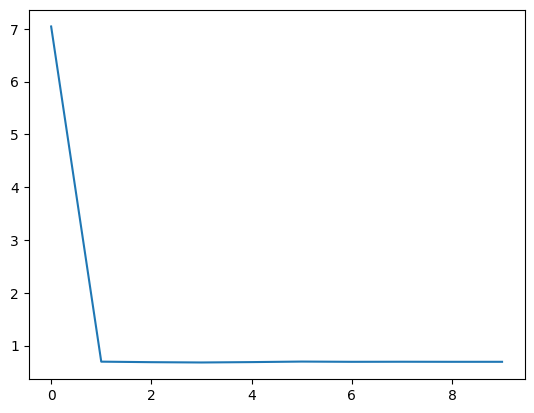

In [ ]:
plt.plot(historico.history['loss'])

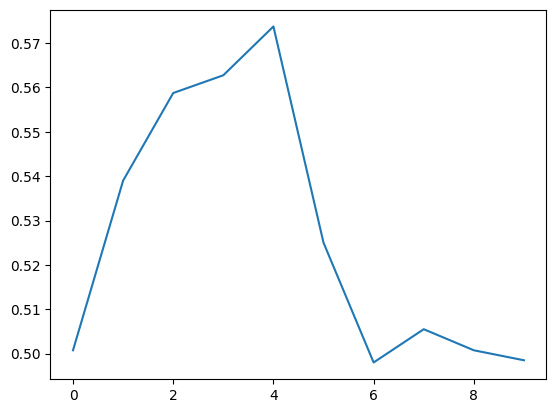

In [ ]:
plt.plot(historico.history['accuracy'])

In [ ]:
X_teste #imagens não usadas

In [ ]:
previsoes = rede.predict(X_teste)
previsoes

32/32 [==============================] - 15s 448ms/step


array([[0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.49884617],
       [0.498

In [ ]:
previsoes = previsoes > 0.5
resposta = []
for item in previsoes:
  if item:
    resposta.append(1)
  else:
    resposta.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_teste, previsoes)

0.5

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_teste, previsoes) #ela precisa de mais treinamento, classificou tudo como uma coisa so
cm

array([[500,   0],
       [500,   0]])

<Axes: >

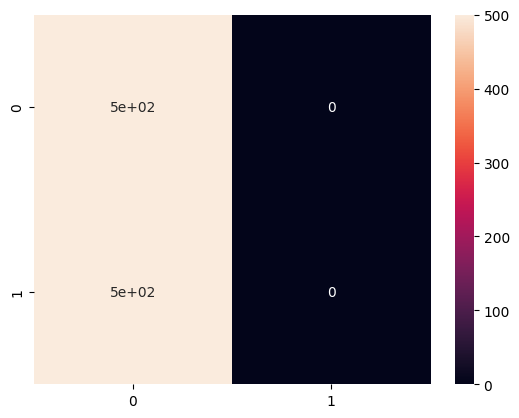

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
